# PRINCIPAL COMPONENT ANALYSIS (PCA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/Principal%20Component%20Analysis(PCA)/wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
# there are some columns having outliers. but I will confirm by plotting boxplot
# no missing values

In [5]:
# checking datatypes

df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [6]:
# detailed analysis of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# checking and confirming missing values

df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
# checking duplicated values

df.duplicated().sum()

0

# DATA VISUALIZATION

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Type'),
  Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Alcalinity'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoids'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'Dilution'),
  Text(13, 0, 'Proline')])

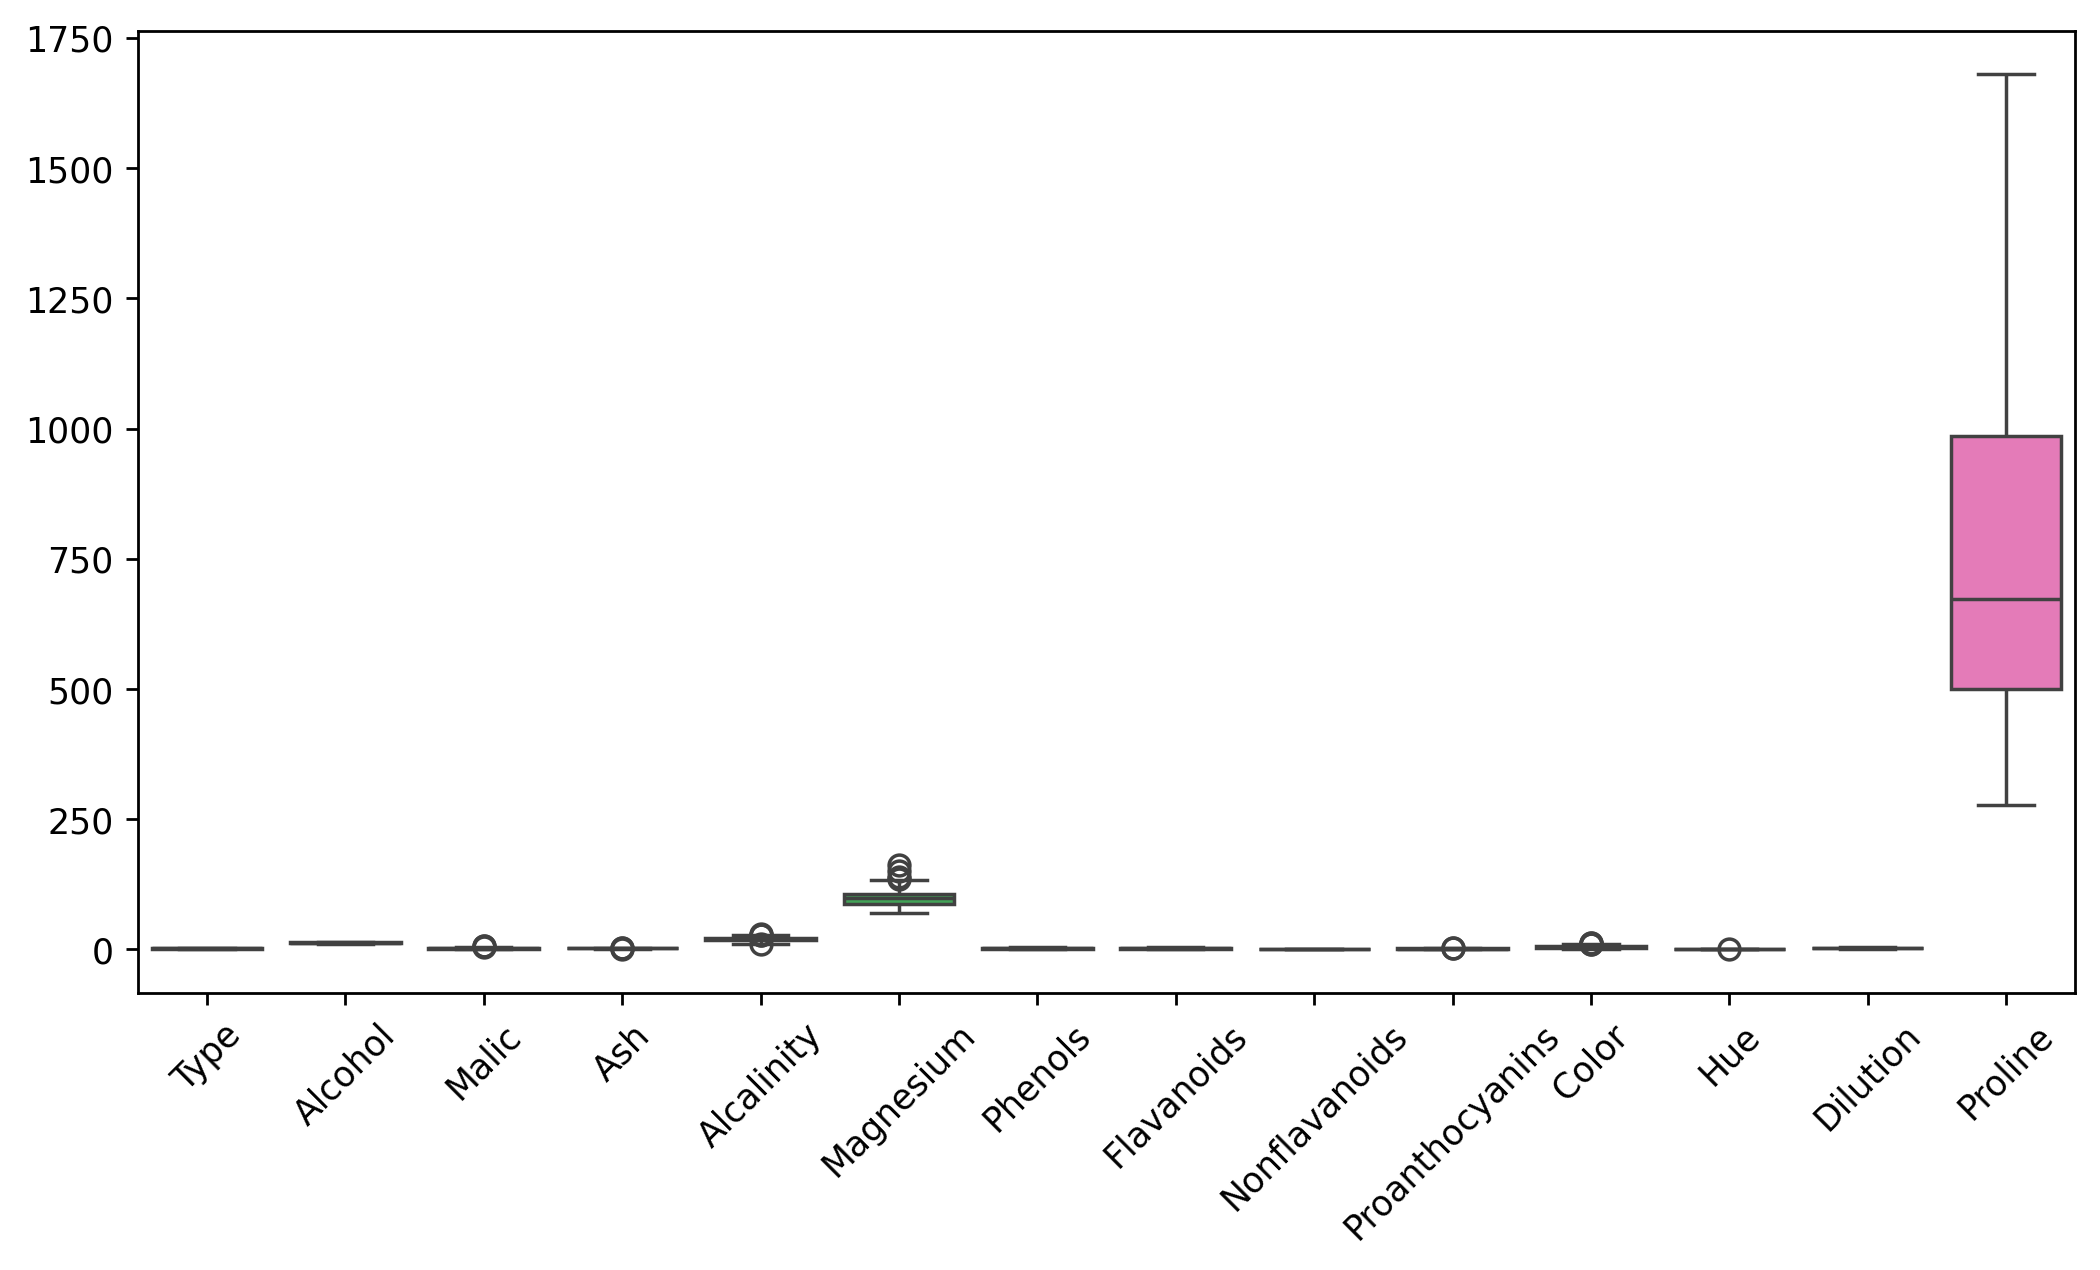

In [9]:
# ploting boxplot
sns.boxplot(df)
plt.xticks(rotation=45)

I can see that there are some columns having outliers but I will not cap them because data size is already very small.

<Axes: xlabel='Ash', ylabel='Count'>

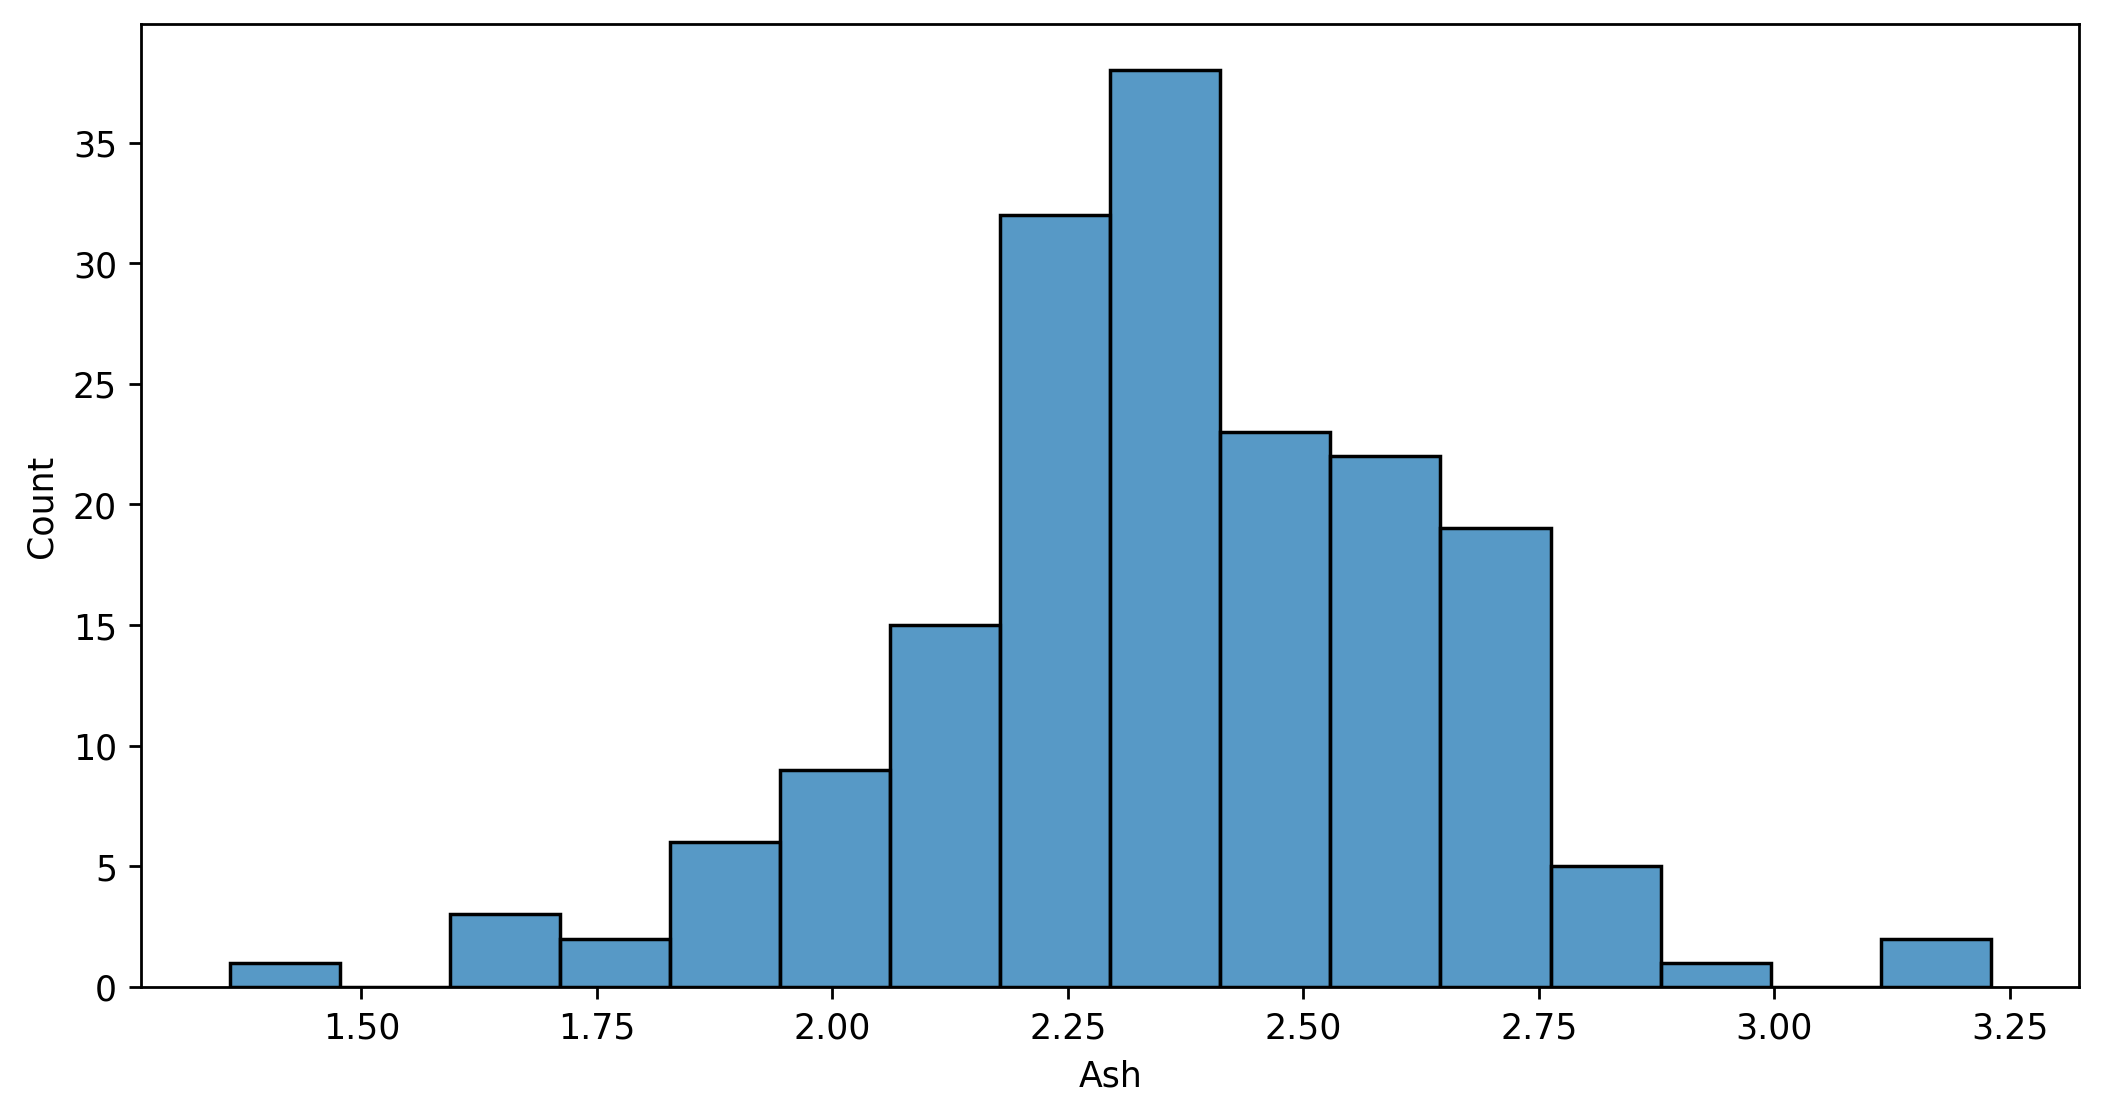

In [10]:
# plotting histogram
sns.histplot(data=df, x='Ash')

In [11]:
# there are some outliers on both extremes but I will keep them as it is

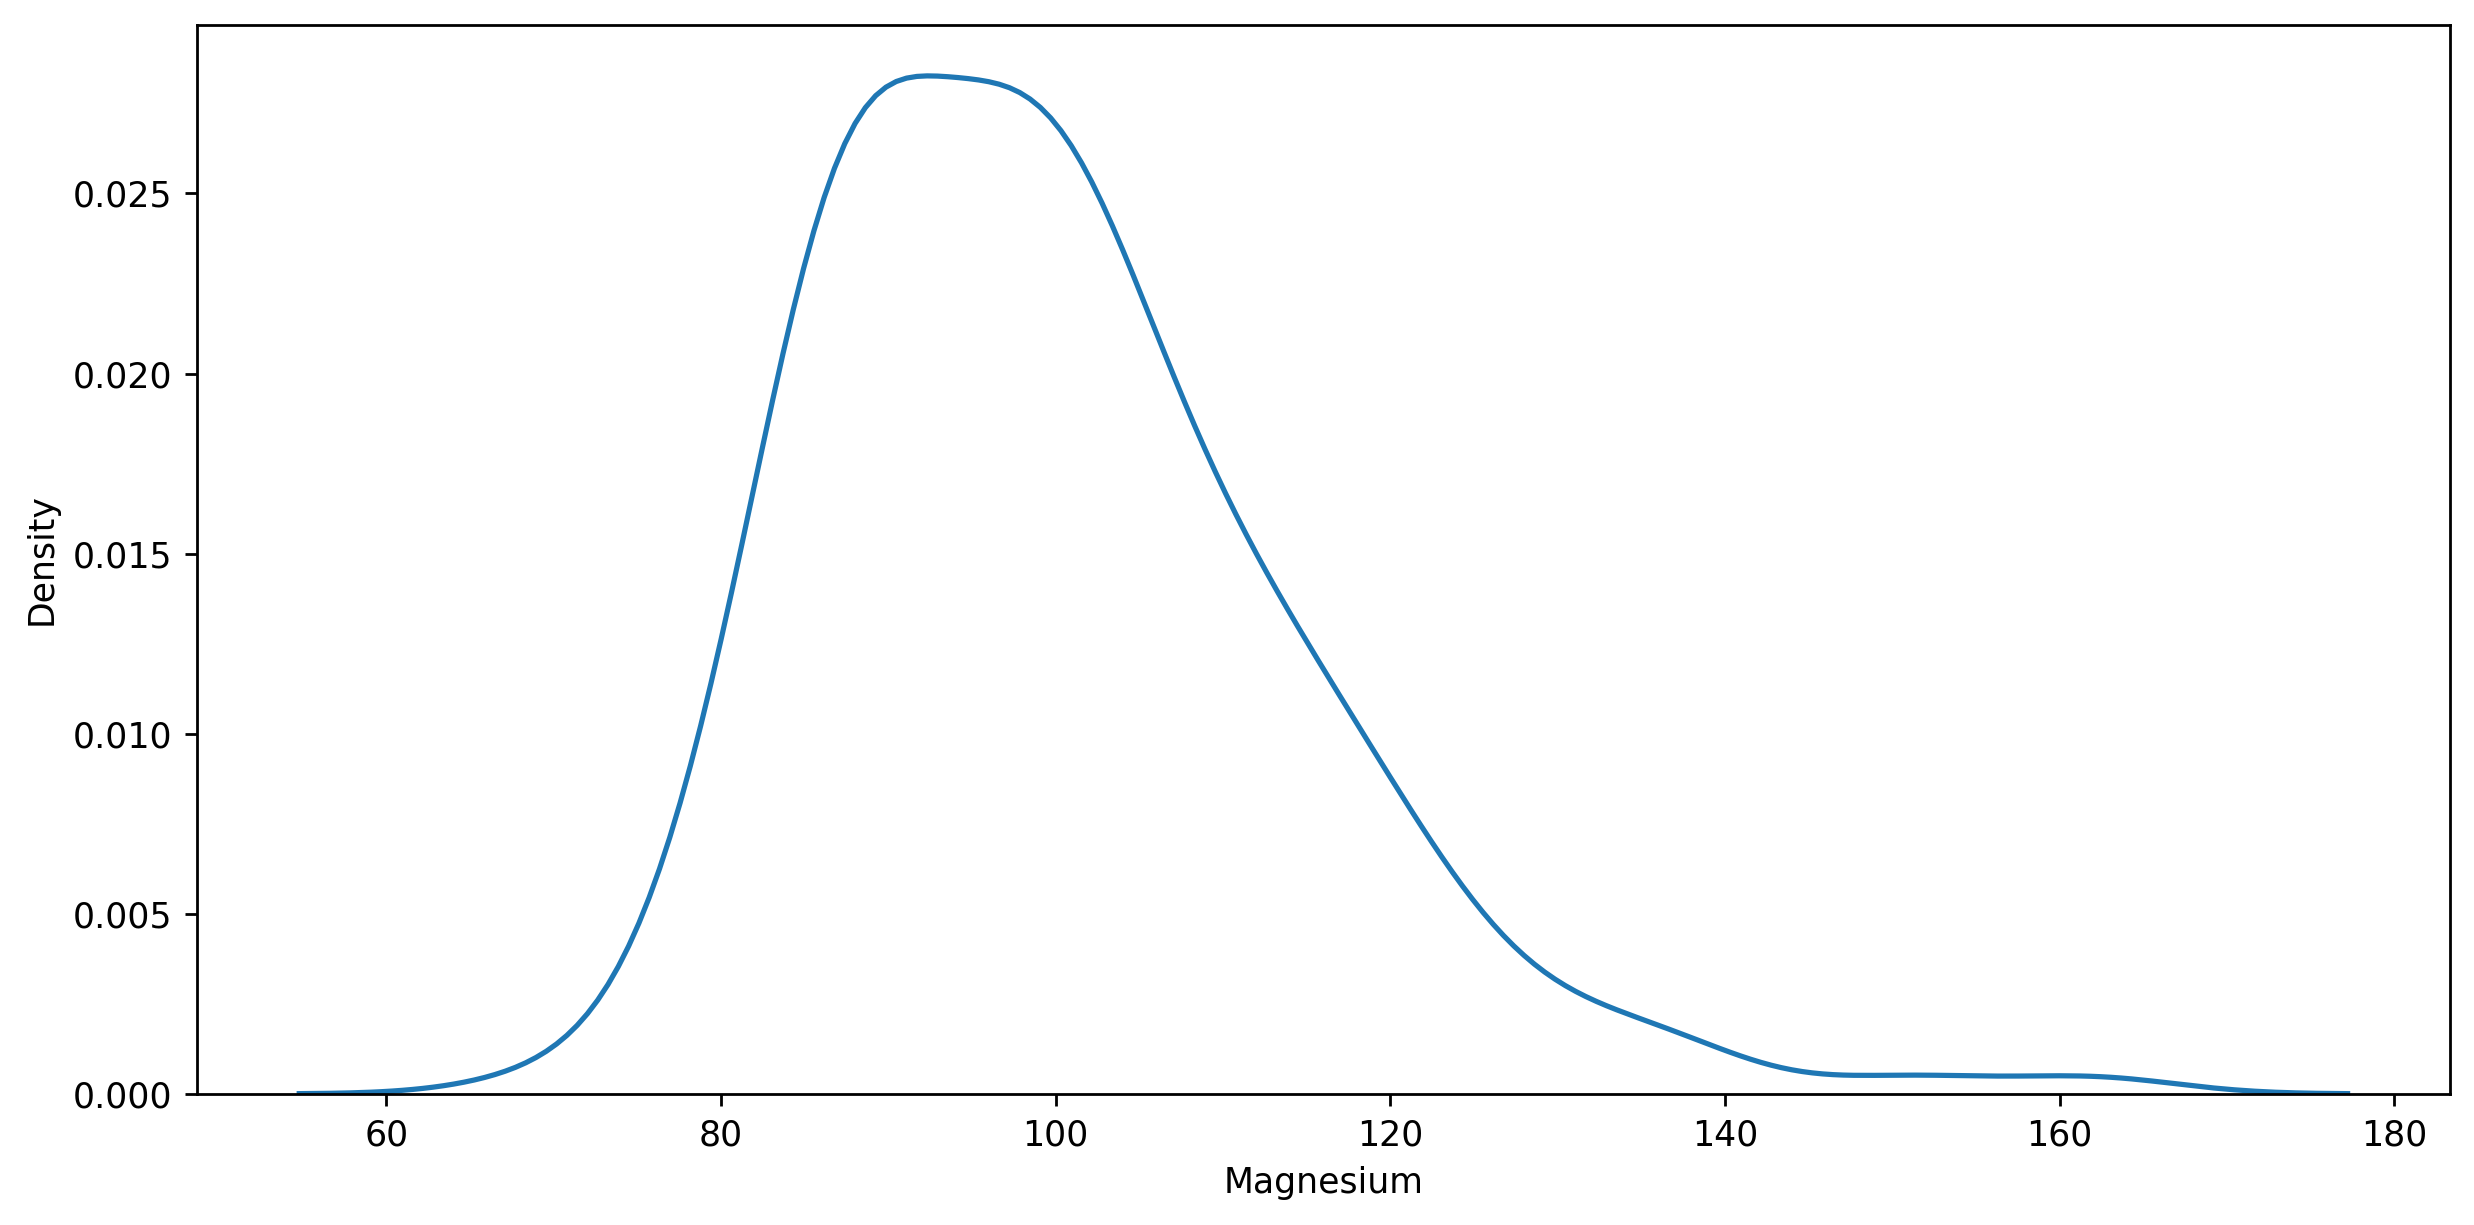

In [12]:
# plotting density plot

sns.kdeplot(data=df, x='Magnesium')
plt.tight_layout()

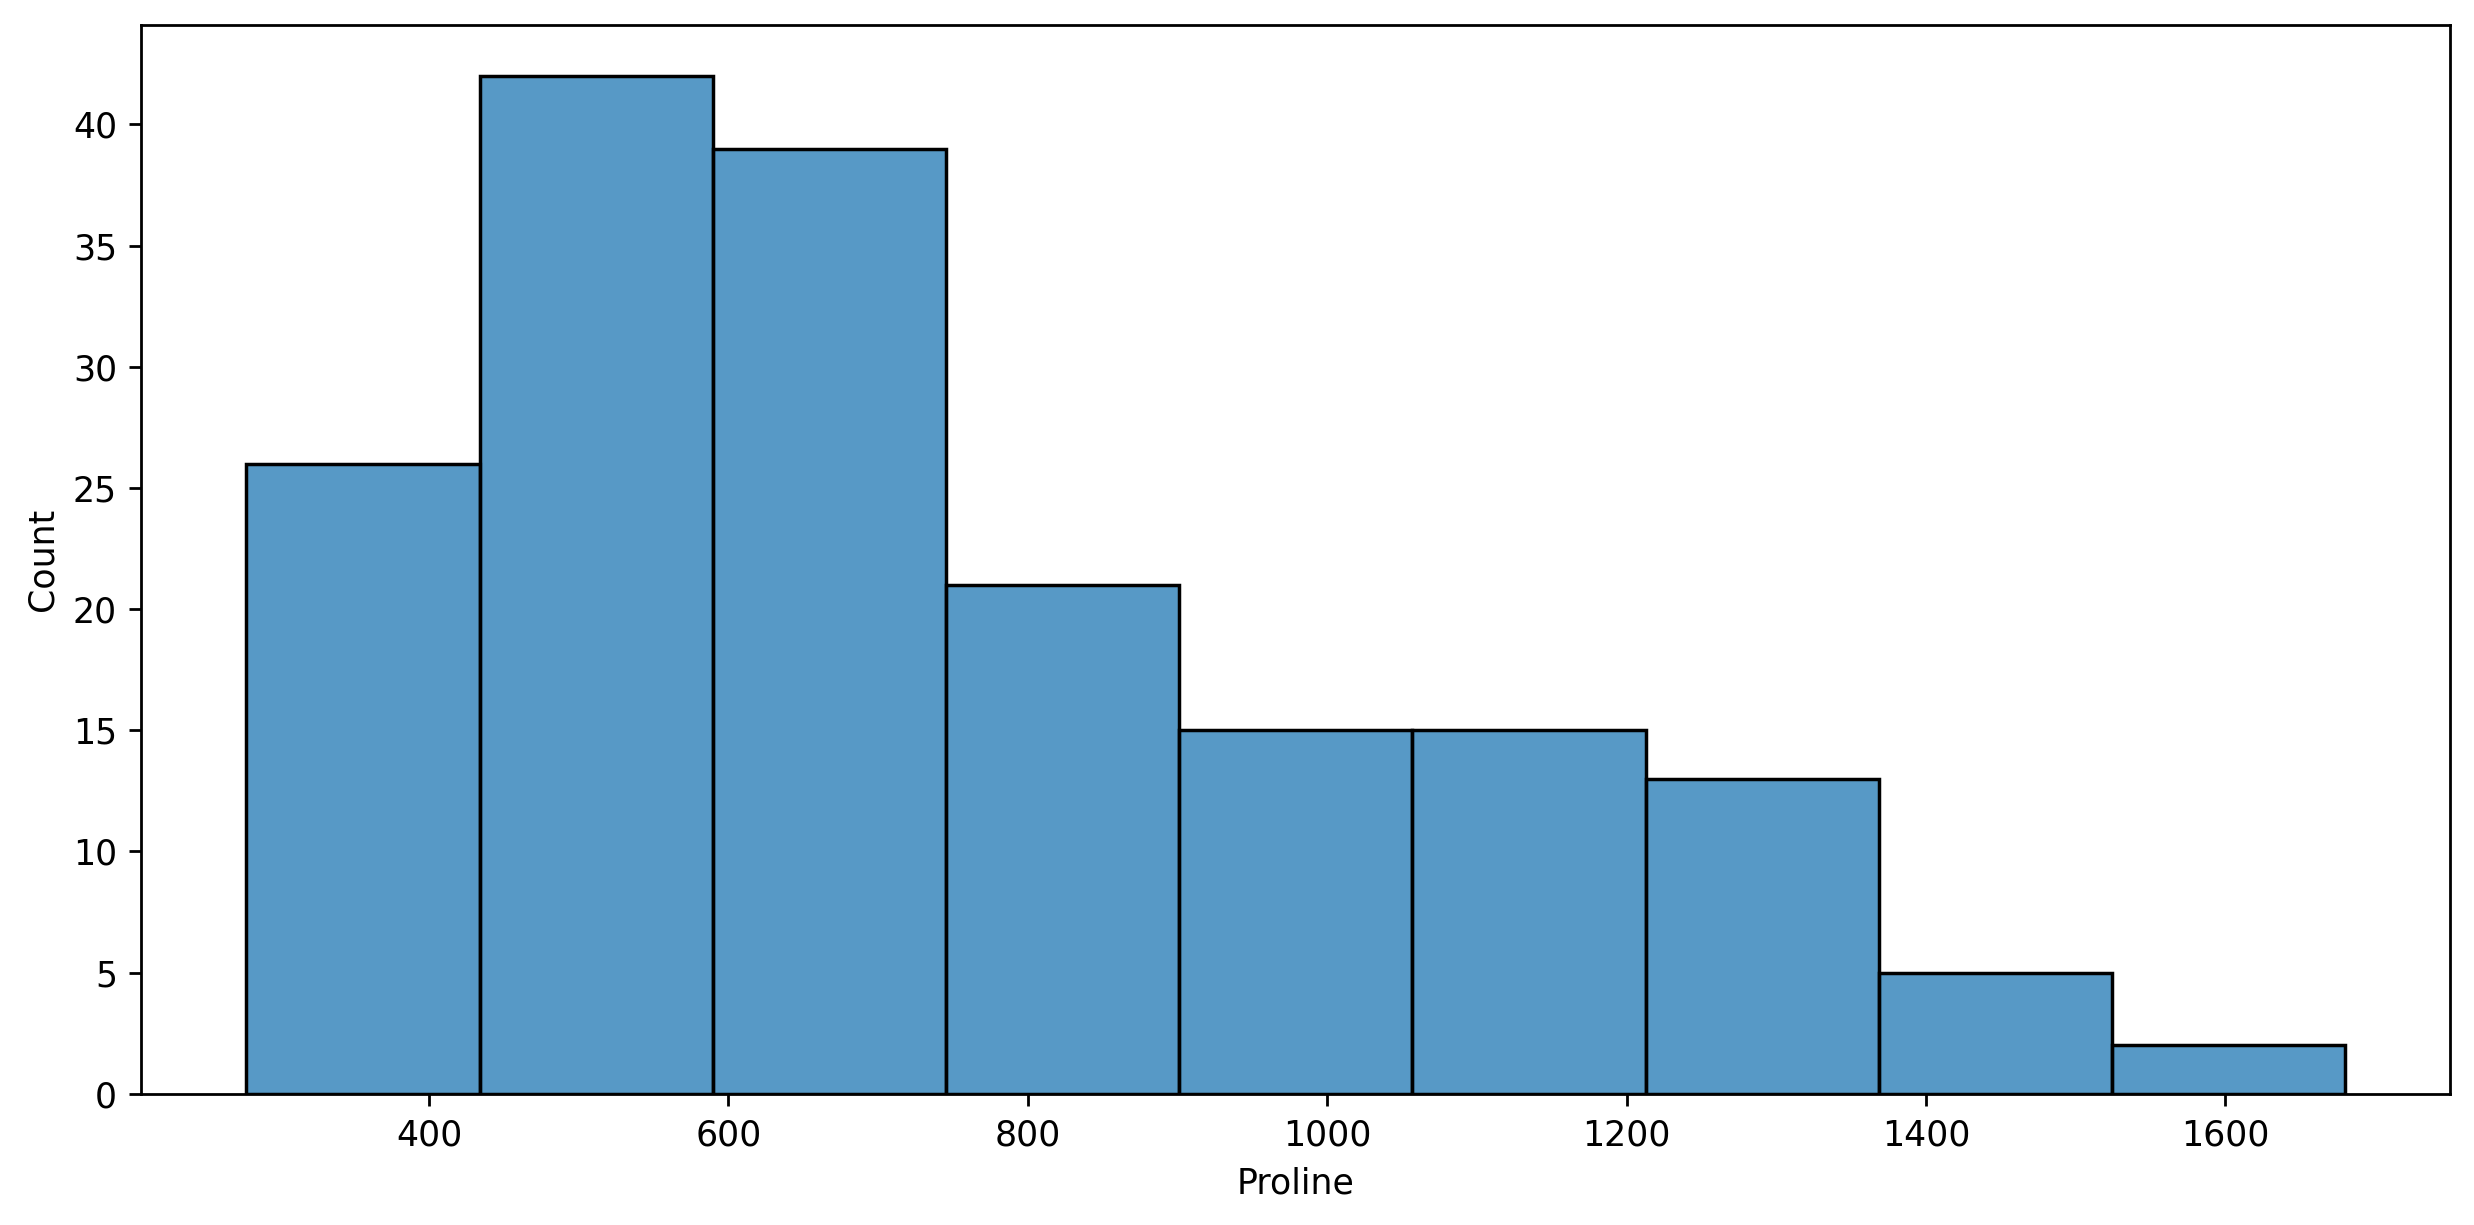

In [13]:
# plotting histogram
sns.histplot(data=df, x='Proline')
plt.tight_layout()

# DATA TRANSFORMATION

In [14]:
# performing standardization

sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
# for my own understanding converted to dataframe datastructure

pd.DataFrame(x, columns=df.columns)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# MODEL BUILDING WITH THE ORIGINAL COLUMNS

In [16]:
model = KMeans()
ypred = model.fit_predict(x)
ypred

array([1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 7, 0, 0, 7, 6, 0, 6,
       7, 7, 0, 5, 0, 6, 0, 6, 6, 7, 7, 0, 5, 4, 7, 7, 0, 0, 6, 7, 0, 0,
       0, 0, 0, 0, 0, 7, 6, 5, 6, 7, 6, 7, 7, 7, 4, 7, 7, 0, 7, 0, 7, 6,
       6, 7, 0, 0, 0, 7, 7, 7, 0, 7, 6, 4, 4, 4, 4, 7, 6, 4, 0, 4, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
# 8 clusters created labelled from 0 to 7

# model evaluation

In [18]:
silhouette_score(x, ypred)

0.17450743521829915

In [19]:
# accuracy is very bad, because it created 8 clusters by default.
# to know the number of actual cluster present in the data I need to perform Hyperparameter Tunning.

# Hyperparameter Tunning

In [20]:
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [21]:
wcss

[2492.0000000000005,
 1728.6747321636262,
 1285.6677396078076,
 1182.948470338926,
 1131.1342328702558,
 1176.5472272131672,
 1070.217773652924,
 997.9953049975338,
 914.4211712466831]

Text(0.5, 1.0, 'elbow graph')

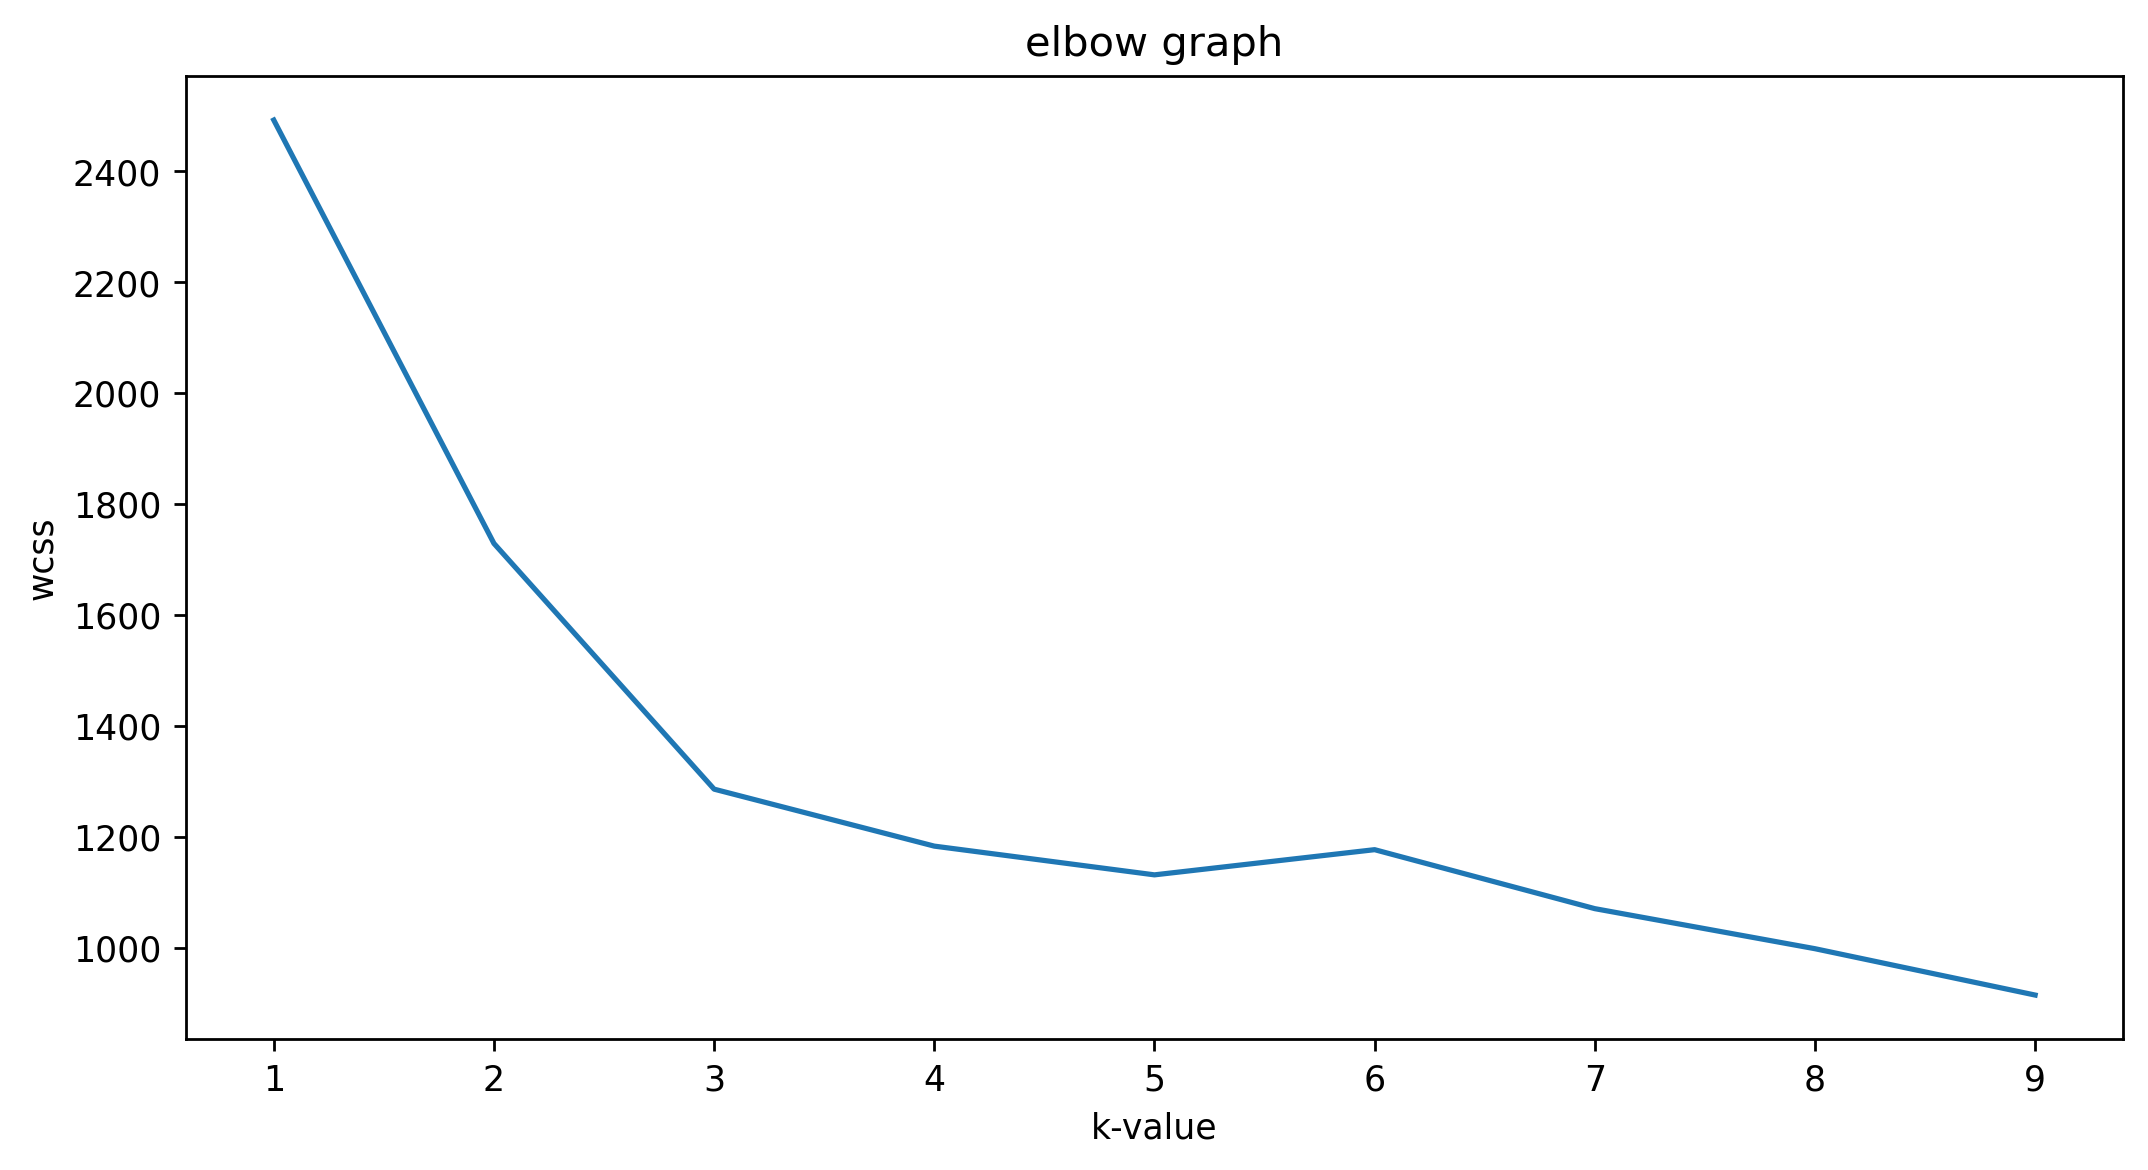

In [22]:
# elbow graph

plt.plot(range(1,10), wcss)
plt.xlabel('k-value')
plt.ylabel('wcss')
plt.title('elbow graph')

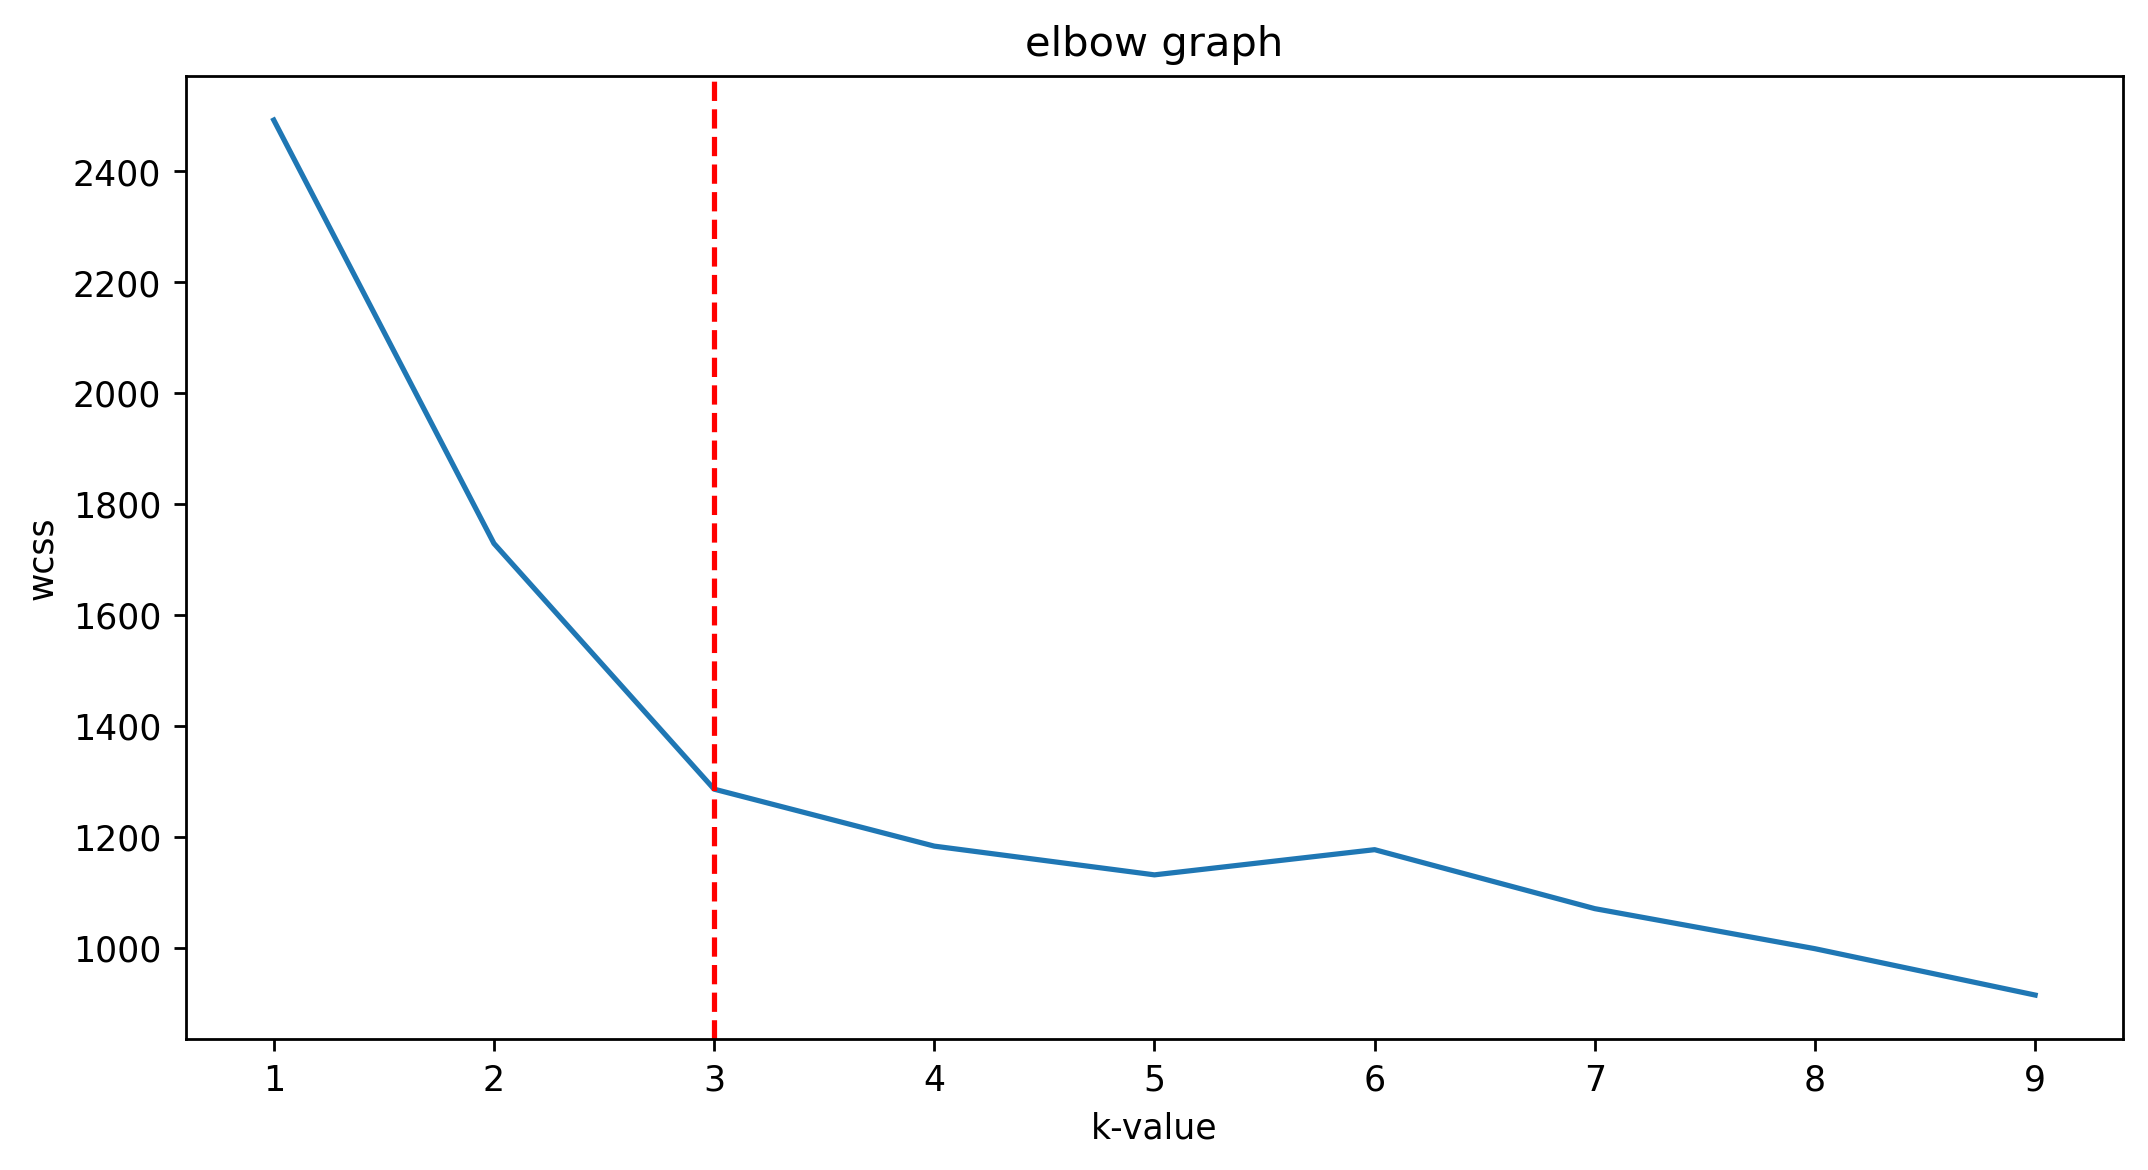

In [23]:
# elbow graph

plt.plot(range(1,10), wcss)
plt.xlabel('k-value')
plt.ylabel('wcss')
plt.title('elbow graph')
plt.axvline(x=3, color='red', linestyle='--')

actual custers are 3 because the distance after 3 is getting reduced very slowly. so I will build final model by creating 3 clusters

# Final Model with original columns

In [24]:
model = KMeans(n_clusters=3)
ypred = model.fit_predict(x)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Model Evaluation

In [25]:
silhouette_score(x, ypred)

0.30648398324833453

In [26]:
# After preforming hyperparameter tunning model's accuracy went from 13% accuracy to 30%

### ANALYSIS OF CLUSTERS

In [27]:
# creating a copy of original data so that the original data will remaing untouched for performing PCA

new_df = df.copy()
new_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
# storing clusters in the dataframe for analysis

new_df['clusters'] = ypred
new_df.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [29]:
new_df.groupby('clusters').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusters,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955


### analysis

In [30]:
# it has created 3 groups:

# in the first group (cluster labe 0) of wines have the highest amount of Proline level.
# in the second group(cluster label 1) it has those wine that are having medium level of Proline.
# in the third group (cluster labe 2) of wines have the least amount of Proline level.

# Principal Component Analysi(PCA)

In [31]:
# ORIGINAL DATA

df.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


Text(0, 0.5, 'Magnesium')

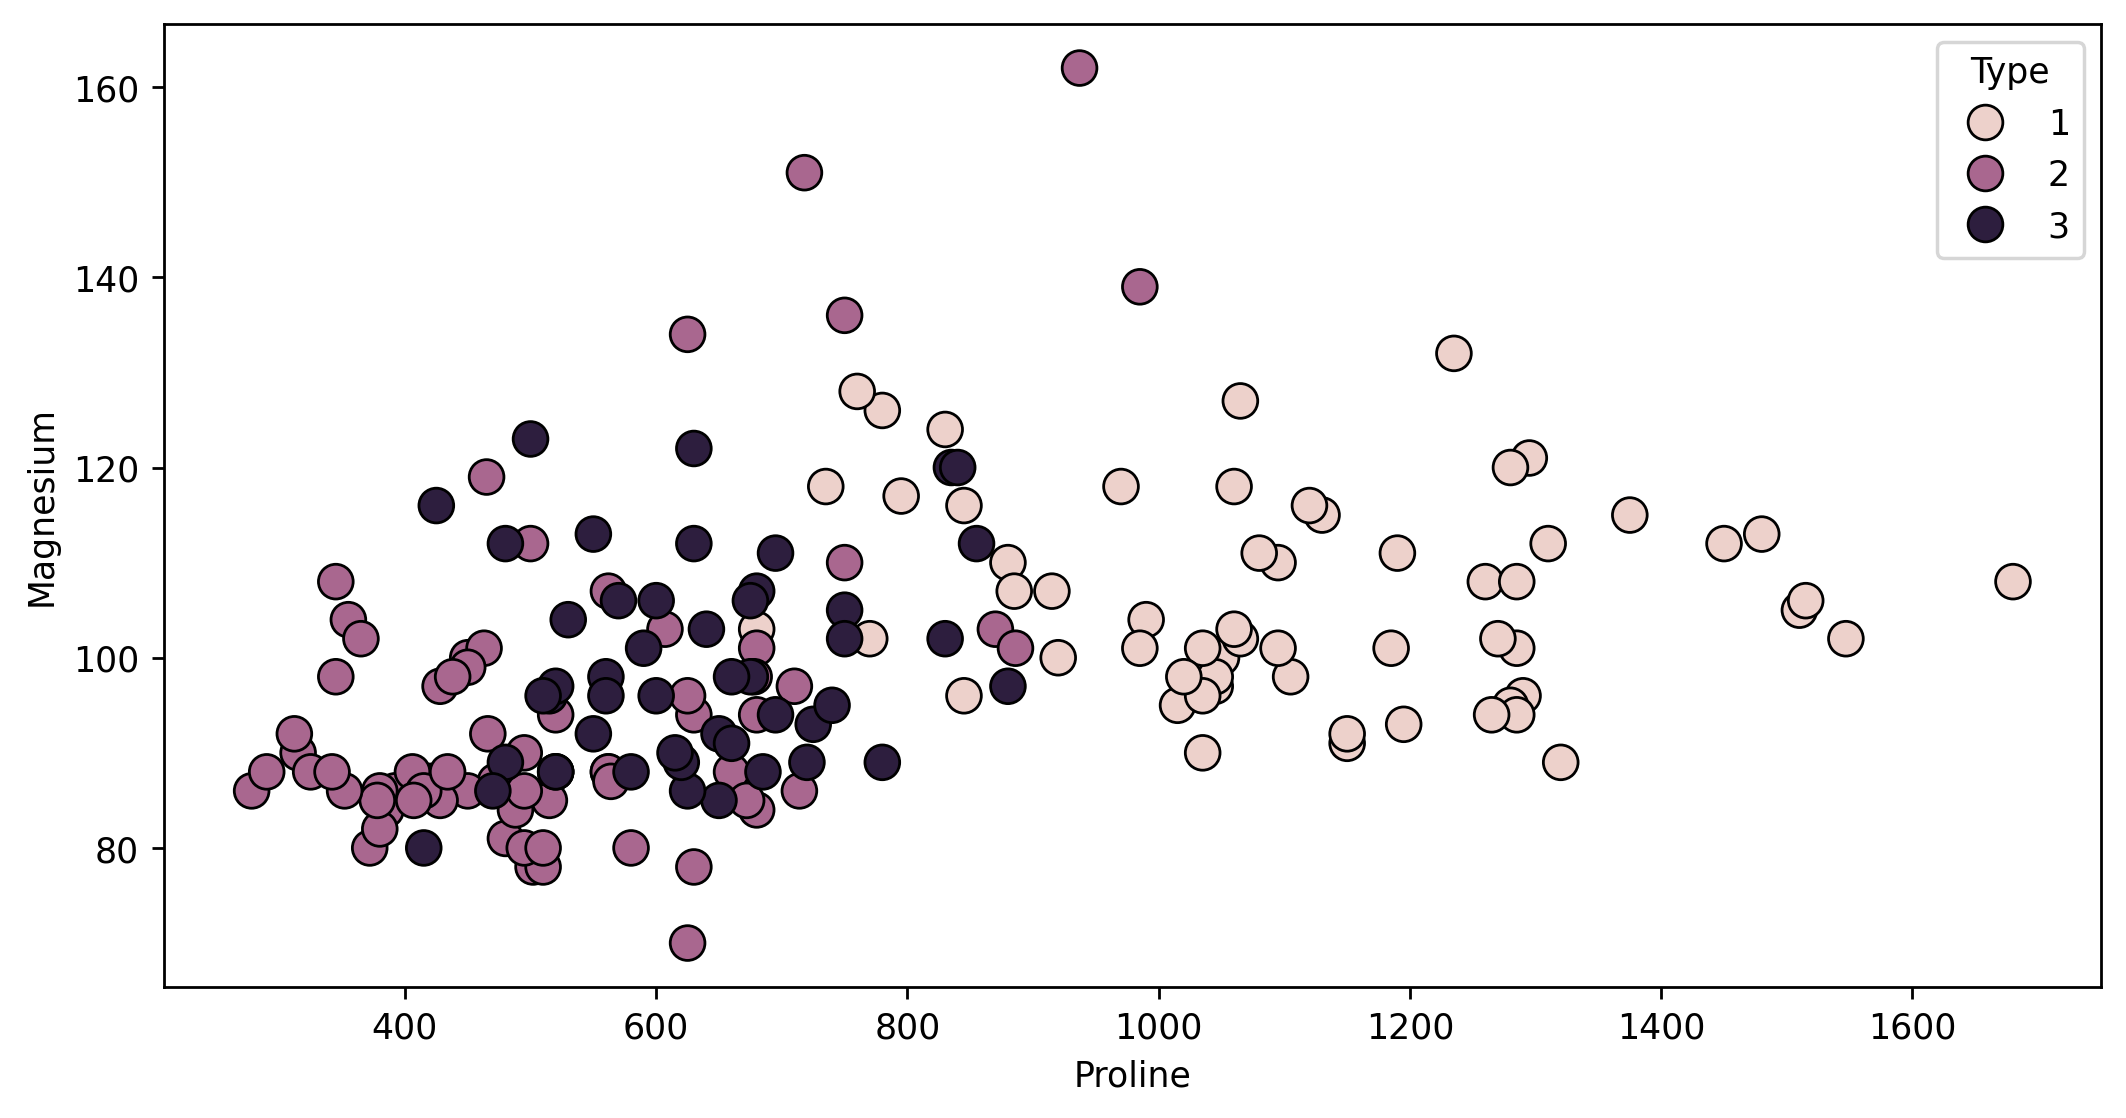

In [32]:
# visualization before PCA

sns.scatterplot(data=df, x='Proline', y='Magnesium',
                hue='Type', s=100, edgecolor='black')
plt.xlabel('Proline')
plt.ylabel('Magnesium')

Text(0, 0.5, 'Alcohol')

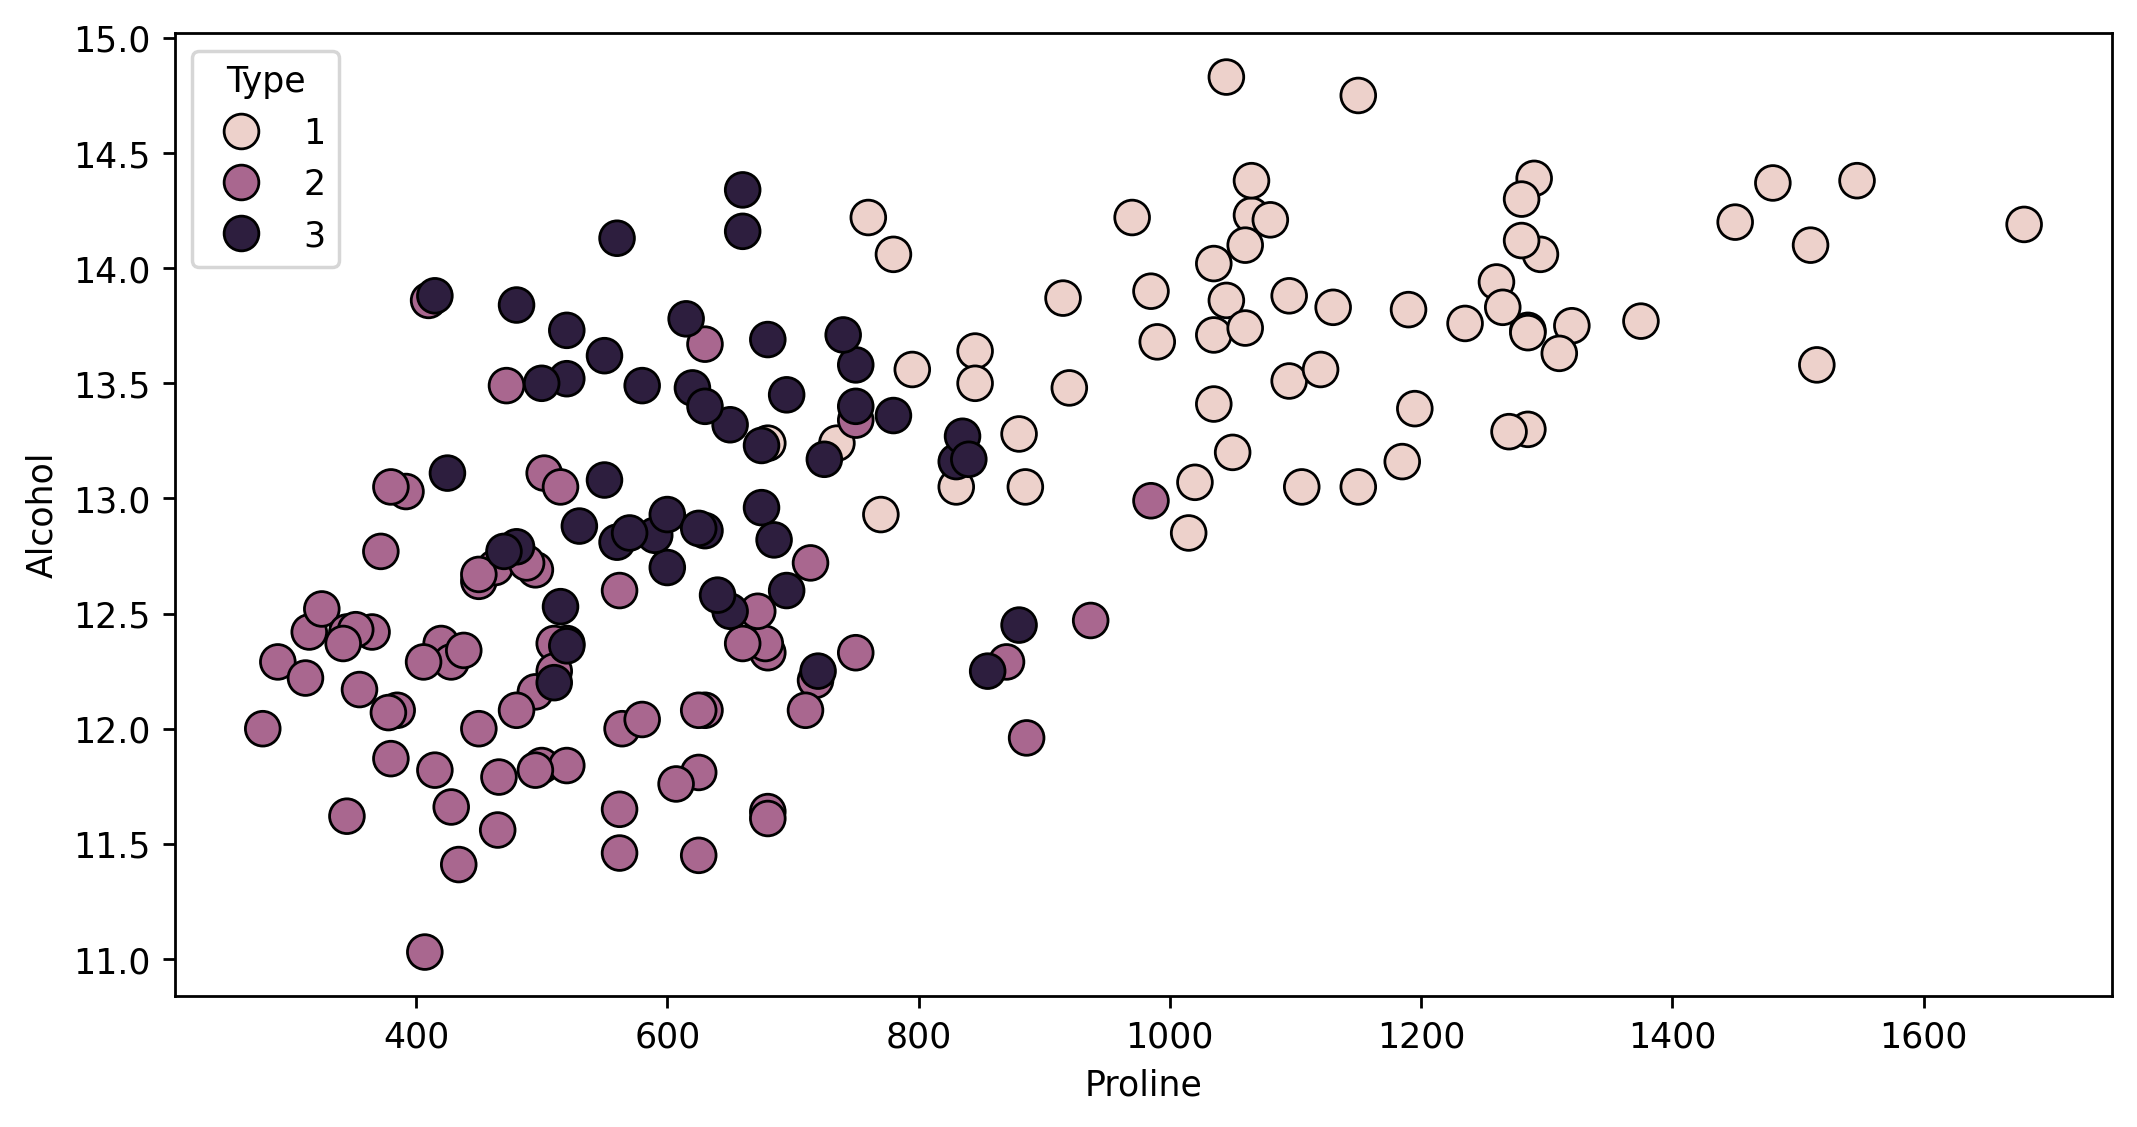

In [33]:
# visualization before PCA

sns.scatterplot(data=df, x='Proline', y='Alcohol',
                hue='Type', s=100, edgecolor='black')
plt.xlabel('Proline')
plt.ylabel('Alcohol')

# PREFORMING PCA

In [34]:
# PCA on standardized data

pca = PCA()
pcs = pca.fit_transform(x)

In [35]:
pcs

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [36]:
# format is not interpretable because PCA is calles black box approach

In [37]:
# getting the percentage of information that PCs have captured(explained_variance_ratio)

pca.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [38]:
# rows and columns in the dataset
df.shape

(178, 14)

##### OBSERVEVATION

it has created 14 principal components(PCs) which is equivalent to the number of dimensions of my dataset but each PC is having information of all 14 columns and the amount of information captured by each PC is different.

In [39]:
# cumulative sum of information gained of PCs(explained_variance_ratio)

np.cumsum(pca.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

We can see that 9 PCs have captured almost 96% (0.95842703) of information, which is enough for now to see the impact of PCA.
4 dimensions will get reduced in this way.

### SCREEPLOT

Text(0.5, 1.0, 'Scree Plot')

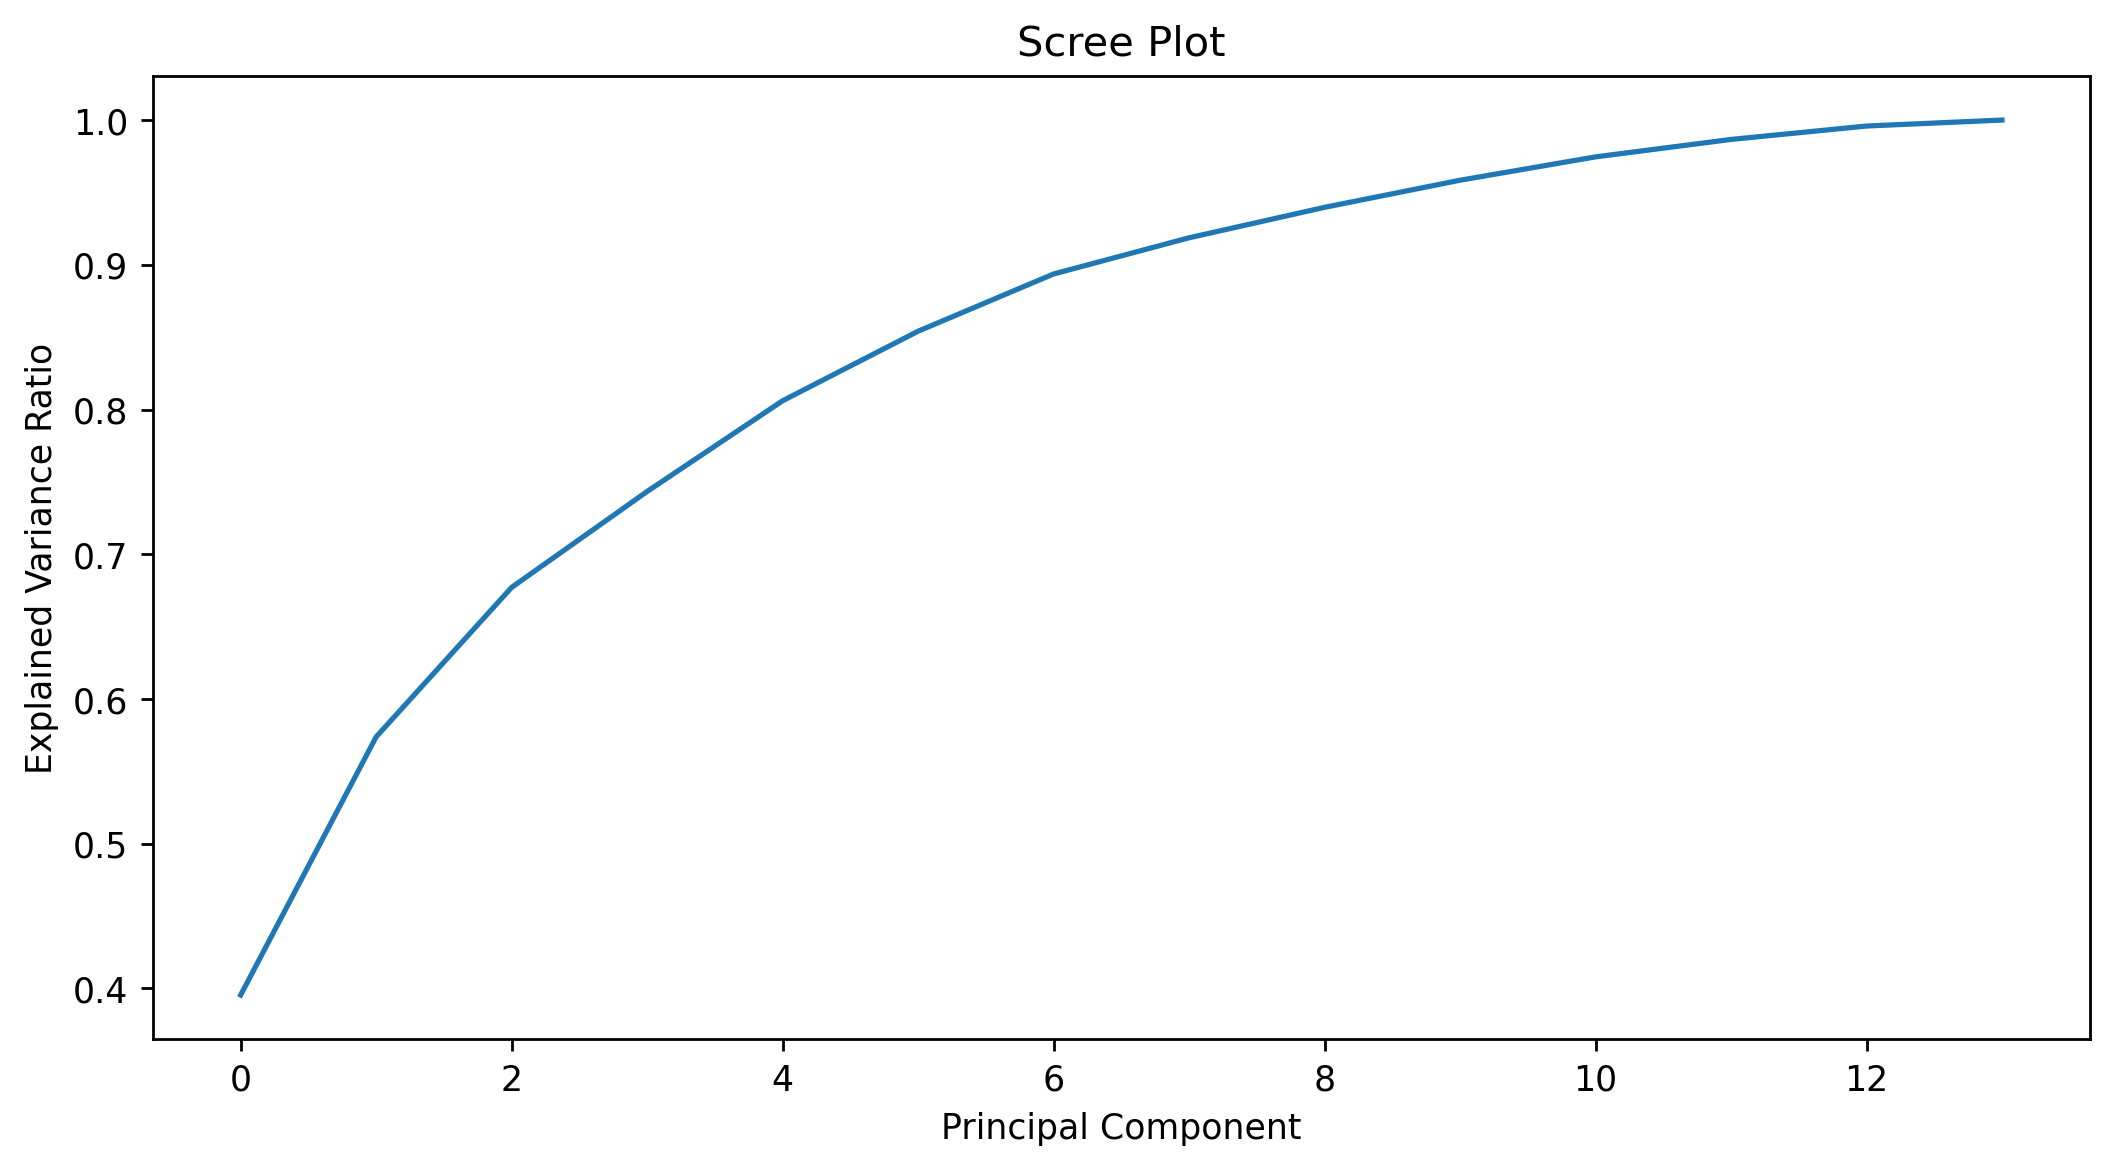

In [40]:
# ploting screeplot to get ann observation

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

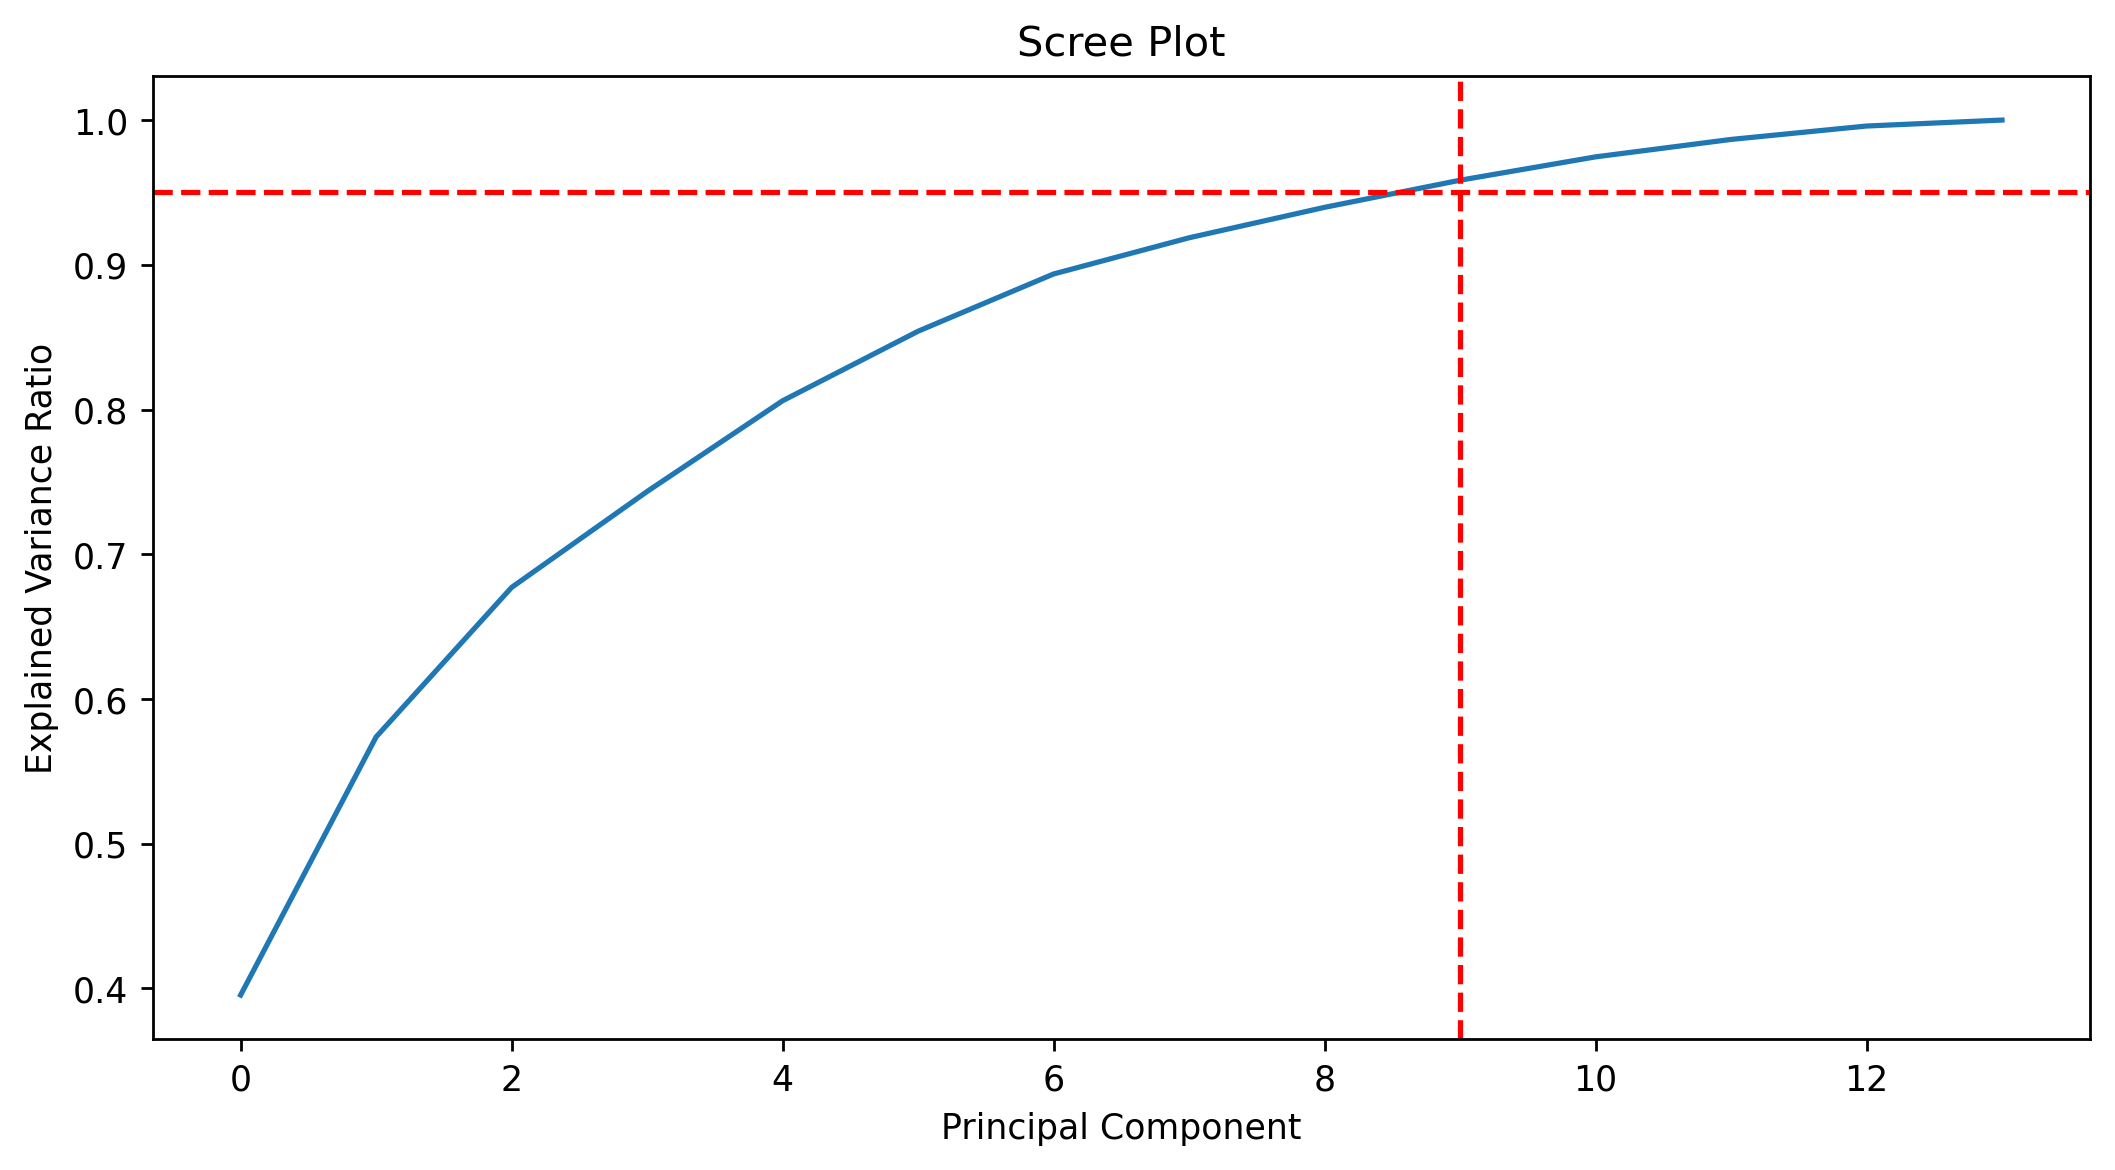

In [41]:
# ploting screeplot to get ann observation

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(y=0.95, color='red', linestyle='--' )
plt.axvline(x=9, color='red', linestyle='--' )

In [42]:
# We can see that 9 PCs have captured almost more than 95% of information, which is enough for now to see the impact of PCA.
# 4 dimensions will get reduced in this way.

In [43]:
# NOW I know how many principal components are enough. So I will create only 9 PCs this time
pca = PCA(n_components=9)
pcs = pca.fit_transform(x)
pcs

array([[-3.5229339 , -1.45309844, -0.16479549, ...,  0.57387557,
         0.05563728, -0.45876506],
       [-2.52885806,  0.33001925, -2.02670665, ..., -0.02971648,
         1.01037189,  0.21880609],
       [-2.78502898, -1.03693595,  0.9832377 , ...,  0.4883054 ,
        -0.26895705,  1.22276949],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304, ...,  0.73302611,
         0.05254455, -0.02788135],
       [ 2.75522166, -2.29378408, -0.55047368, ...,  0.75542325,
         0.42651198,  0.04878416],
       [ 3.49633565, -2.76060799,  1.01315115, ...,  0.01530664,
        -0.32500213, -0.7199834 ]])

In [44]:
# now I will convert this 9 PCs into dataframe datastructure to perform Clustering
data = pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548
...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784


In [45]:
# creating a copy of PCs for visualization
data1 = data.copy()

In [46]:
# converted to dataframe and created a new column for storing the type of vine
data1 = pd.DataFrame(data1, columns=data.columns)
data1['Type'] = df['Type']
data1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Type
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,1
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,1
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,1
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,1
...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,3
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,3
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,3
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,3


In [47]:
data1['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

Text(0, 0.5, 'PC2')

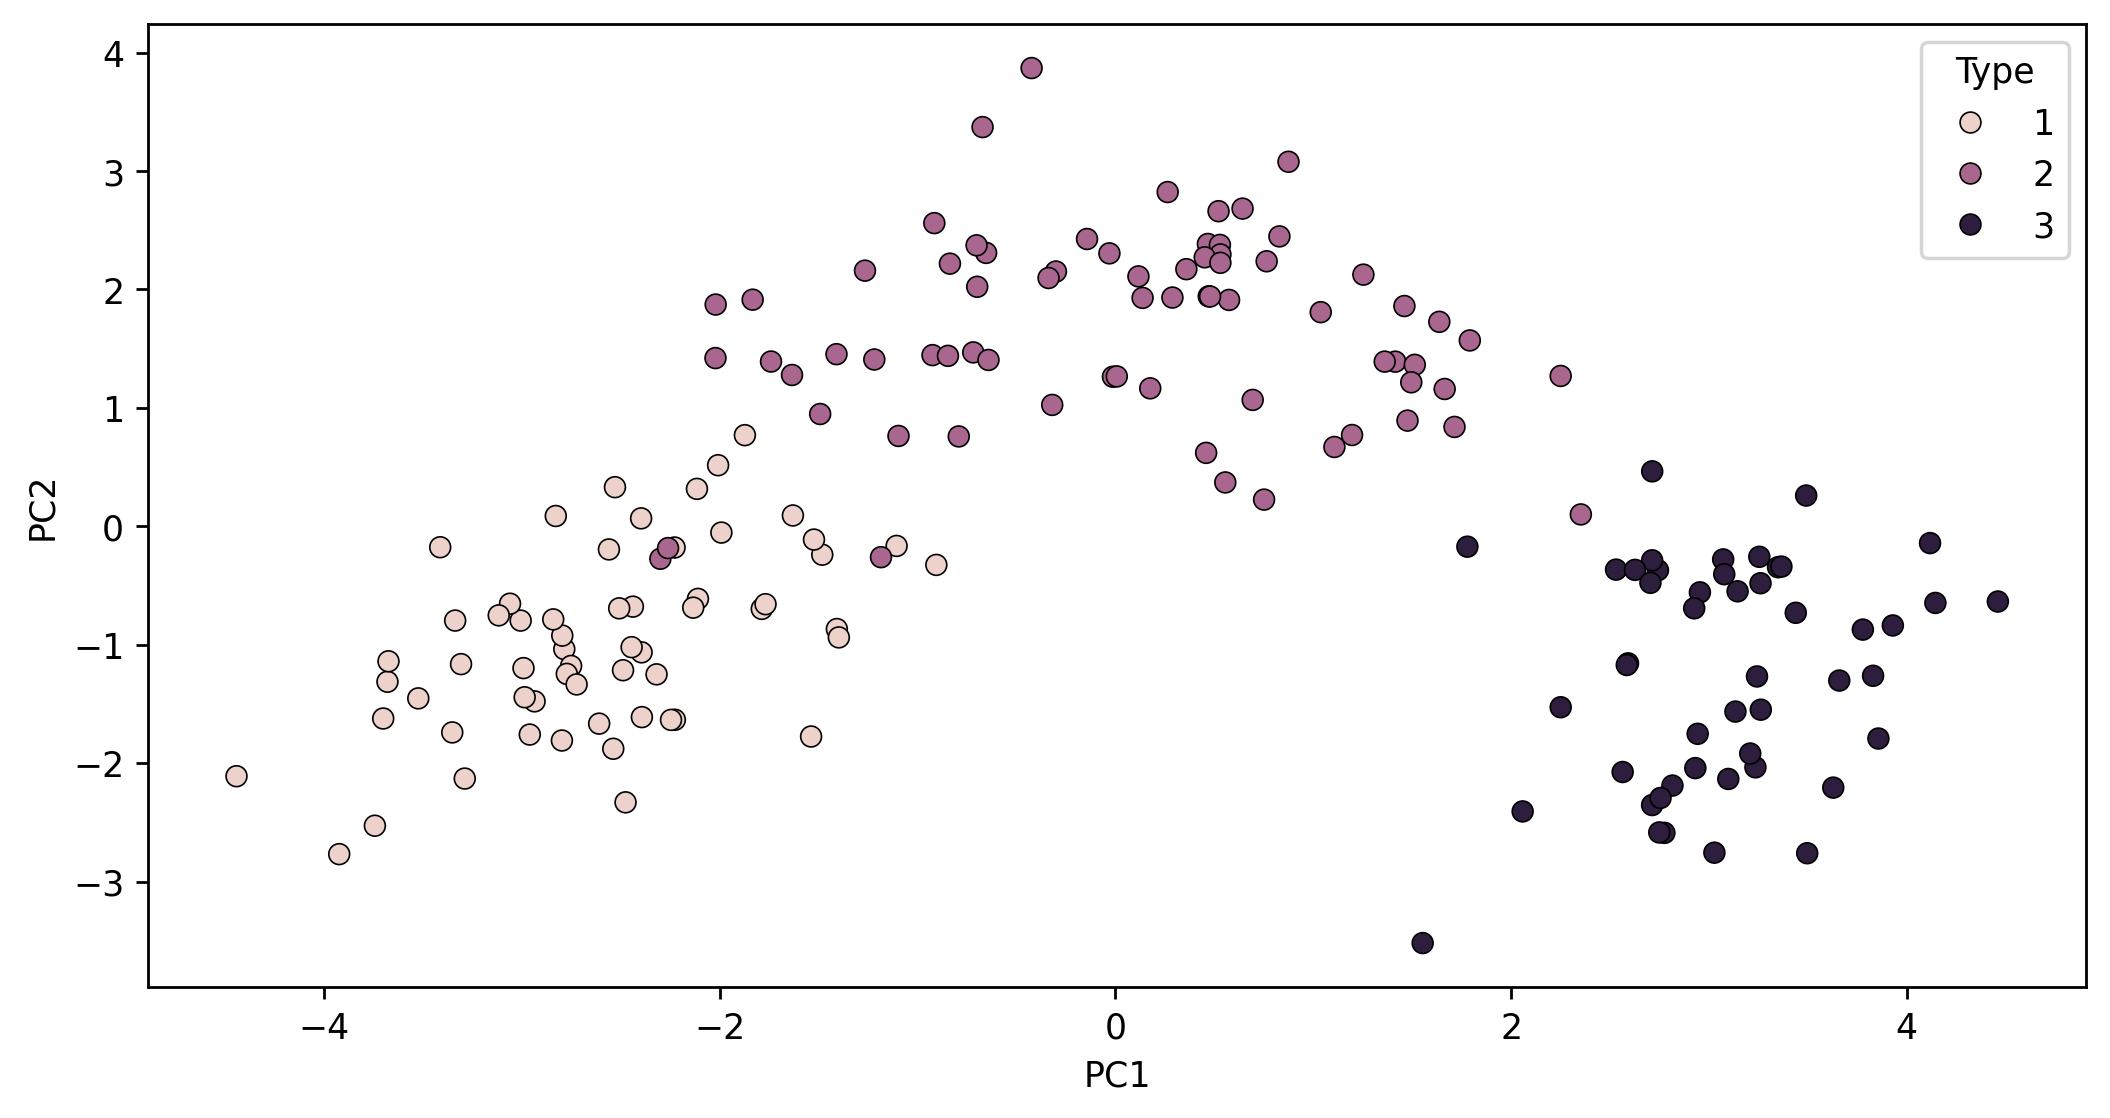

In [48]:
# data visualization after performing PCA
sns.scatterplot(data=data1, x='PC1', y='PC2',
                hue='Type',
                edgecolor='black'
               )
plt.xlabel('PC1')
plt.ylabel('PC2')

In [49]:
# using this data to crete model

# MODEL BUILDING ON PCs

In [50]:
# clustering model KMeans
pc_model = KMeans(n_clusters=3)
predicted = pc_model.fit_predict(data)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

# MODEL EVALUATION

In [51]:
silhouette_score(data, predicted)

0.3310070215972983

In [52]:
# accuracy increased by almost 3% (percent) after performing PCA

# ANALYSIS of Clusters

In [53]:
# storing labels of created cluster given to each datapoint
data['cluters'] = predicted
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluters
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,1
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,1
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,1
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,1
...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,0
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,0
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,0
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0


In [54]:
# analysis of clusters

data.groupby('cluters').agg('mean')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
cluters,,,,,,,,,
0,3.058665,-1.208263,-0.177541,0.095731,0.071641,0.094968,-0.062648,-0.044149,-0.017207
1,-2.548859,-0.936610,0.001632,-0.177491,-0.117356,-0.200419,0.031734,0.027931,0.063952
2,0.121711,1.750369,0.128334,0.094233,0.056204,0.116009,0.016451,0.006441,-0.046595


In [55]:
# It's not possible to analye this clusters because data is present in scalled format

# oberrvation before and after PCA:

In [56]:
# accuracy of model (silhouette score)increased by almost 3% (percent) after performing PCA

# 4 DIMENSIONS reduced

# time complexity reduced

# coputational cost reduced

# It's not possible to analye this clusters because data is present in scalled format 
# so this should be more useful for Supervised Machine learning algorithms